In [49]:
import numpy as np
import cv2

# Q.11 平滑化フィルタ

In [50]:
def smooth_filter(img):
    H, W, C = img.shape
    
    #zero padding
    output = np.zeros((H+2, W+2, C), dtype = np.float)
    output[1:1+H, 1:1+W] = img.copy().astype(np.float)
    
    #create filter
    kernel = np.ones((3, 3))
    kernel /= 9
    
    tmp = output.copy()
    
    #filtering
    for i in range(H):
        for j in range(W):
            for k in range(0, 3):
                tmp[i+1, j+1, k] = np.sum(output[i:i+3, j:j+3, k].copy() * kernel)
                
    tmp = np.clip(tmp, 0, 255)
                
    output = tmp[1:1+H, 1:1+W].astype(np.uint8)
    
    return output

img = cv2.imread("imori.jpg")
img = smooth_filter(img)
cv2.imwrite("answers/answer11.jpg", img)

True

## opencvの場合

In [61]:
img = cv2.imread("imori.jpg")

img = cv2.blur(img, (3, 3))

cv2.imwrite("answers/answer11.jpg", img)

True

# Q.12 モーションフィルタ

In [51]:
def motion_filter(img):
    H, W, C = img.shape
    
    #zero padding
    output = np.zeros((H+2, W+2, C), dtype=np.float)
    output[1:1+H, 1:1+W] = img.copy().astype(np.float)
    
    #create filter
    kernel = np.diag([1]*3).astype(np.float)
    kernel /= 3
    
    tmp = output.copy()
    
    #filtering
    for i in range(H):
        for j in range(W):
            for k in range(C):
                tmp[1+i, 1+j, k] = np.sum(output[i:i+3, j:j+3, k].copy() * kernel)
                
    tmp = np.clip(tmp, 0, 255)
    
    output = tmp[1:1+H, 1:1+W].astype(np.uint8)
    
    return output

img = cv2.imread("imori.jpg")
img = motion_filter(img)
cv2.imwrite("answers/answer12.jpg", img)

True

## opencvの場合

基本的にはフィルター作ってcv2.filter2D()をやるだけ
第二引数には出力画像のbit深度を指定できる。負の値にすると入力画像と同じになる

In [62]:
img = cv2.imread("imori.jpg")

#create filter
kernel = np.diag([1]*3).astype(np.float)
kernel /= 3

img = cv2.filter2D(img, -1, kernel)

cv2.imwrite("answers/answer12.jpg", img)

True

# Q.13 MAX-MINフィルタ

In [52]:
def RGB2GRAY(img):
    #色取り出し
    red = img[:, :, 2].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 0].copy()
    
    img = 0.2126*red + 0.7152*green + 0.0722*blue
    img = img.astype(np.uint8)
    
    return img

def MAX_MIN_filter(img):
    img = RGB2GRAY(img)
    
    H, W = img.shape
    
    #zero padding
    output = np.zeros((2+H, 2+W), dtype=np.float)
    output[1:1+H, 1:1+W] = img.copy().astype(np.float)
    
    tmp = output.copy()
    
    #filtering
    for i in range(H):
        for j in range(W):
            tmp[i+1, j+1] = np.max(output[i:i+3, j:j+3]) - np.min(output[i:i+3, j:j+3])
            
    tmp = np.clip(tmp, 0, 255)
            
    output = tmp[1:1+H, 1:1+W].astype(np.uint8)
    
    return output

img = cv2.imread("imori.jpg")
img = MAX_MIN_filter(img)
cv2.imwrite("answers/answer13.jpg", img)

True

## opencvの場合

存在しなくね？

# Q.14 微分フィルタ

In [53]:
def RGB2GRAY(img):
    #色取り出し
    red = img[:, :, 2].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 0].copy()
    
    img = 0.2126*red + 0.7152*green + 0.0722*blue
    img = img.astype(np.uint8)
    
    return img

def bibun_filter(img):
    img = RGB2GRAY(img)
    
    H, W = img.shape
    
    #zero padding
    output_v = np.zeros((2+H, 2+W), dtype=np.float)
    output_h = np.zeros((2+H, 2+W), dtype=np.float)
    output_v[1:1+H, 1:1+W] = img.copy().astype(np.float)
    output_h[1:1+H, 1:1+W] = img.copy().astype(np.float)
    
    tmp_v = output_v.copy()
    tmp_h = output_h.copy()
    
    #create filter
    kernel_v = np.array([[0, -1, 0], [0, 1, 0], [0, 0, 0]]).astype(np.float)
    kernel_h = np.array([[0, 0, 0], [-1, 1, 0], [0, 0, 0]]).astype(np.float)
    
    #filtering
    for i in range(H):
        for j in range(W):
            tmp_v[i+1, j+1] = np.sum(output_v[i:i+3, j:j+3] * kernel_v)
            tmp_h[i+1, j+1] = np.sum(output_h[i:i+3, j:j+3] * kernel_h)
            
    tmp_v = np.clip(tmp_v, 0, 255)
    tmp_h = np.clip(tmp_h, 0, 255)
            
    output_v = tmp_v[1:1+H, 1:1+W].astype(np.uint8)
    output_h = tmp_h[1:1+H, 1:1+W].astype(np.uint8)
    
    return output_v, output_h

img = cv2.imread("imori.jpg")
img_v, img_h = bibun_filter(img)
cv2.imwrite("answers/answer14_v.jpg", img_v)
cv2.imwrite("answers/answer14_h.jpg", img_h)

True

np.clipの重要さを知った。。。

## opencvの場合

In [64]:
img = cv2.imread("imori.jpg")

kernel_v = np.array([[0, -1, 0], [0, 1, 0], [0, 0, 0]])
kernel_h = np.array([[0, 0, 0], [-1, 1, 0], [0, 0, 0]])

img_v = cv2.filter2D(img, -1, kernel_v)
img_h = cv2.filter2D(img, -1, kernel_h)

cv2.imwrite("answers/answer14_v.jpg", img_v)
cv2.imwrite("answers/answer14_h.jpg", img_h)

True

# Sobelフィルタ

In [54]:
def RGB2GRAY(img):
    #色取り出し
    red = img[:, :, 2].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 0].copy()
    
    img = 0.2126*red + 0.7152*green + 0.0722*blue
    img = img.astype(np.uint8)
    
    return img

def sobel_filter(img):
    img = RGB2GRAY(img)
    
    H, W = img.shape
    
    #zero padding
    output_v = np.zeros((2+H, 2+W), dtype=np.float)
    output_h = np.zeros((2+H, 2+W), dtype=np.float)
    output_v[1:1+H, 1:1+W] = img.copy().astype(np.float)
    output_h[1:1+H, 1:1+W] = img.copy().astype(np.float)
    
    tmp_v = output_v.copy()
    tmp_h = output_h.copy()
    
    #create filter
    kernel_v = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]).astype(np.float)
    kernel_h = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]).astype(np.float)
    
    #filtering
    for i in range(H):
        for j in range(W):
            tmp_v[i+1, j+1] = np.sum(output_v[i:i+3, j:j+3] * kernel_v)
            tmp_h[i+1, j+1] = np.sum(output_h[i:i+3, j:j+3] * kernel_h)
            
    tmp_v = np.clip(tmp_v, 0, 255)
    tmp_h = np.clip(tmp_h, 0, 255)
            
    output_v = tmp_v[1:1+H, 1:1+W].astype(np.uint8)
    output_h = tmp_h[1:1+H, 1:1+W].astype(np.uint8)
    
    return output_v, output_h

img = cv2.imread("imori.jpg")
img_v, img_h = sobel_filter(img)
cv2.imwrite("answers/answer15_v.jpg", img_v)
cv2.imwrite("answers/answer15_h.jpg", img_h)

True

## opencvの場合

In [72]:
img = cv2.imread("imori.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_v = cv2.Sobel(img, -1, 1, 0, ksize=3)
img_h = cv2.Sobel(img, -1, 0, 1, ksize=3)

cv2.imwrite("answer15_v.jpg", img_v)
cv2.imwrite("answer15_h.jpg", img_h)

True

# Q.16 Prewittフィルタ

In [55]:
def RGB2GRAY(img):
    #色取り出し
    red = img[:, :, 2].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 0].copy()
    
    img = 0.2126*red + 0.7152*green + 0.0722*blue
    img = img.astype(np.uint8)
    
    return img

def prewitt_filter(img):
    img = RGB2GRAY(img)
    
    H, W = img.shape
    
    #zero padding
    output_v = np.zeros((2+H, 2+W), dtype=np.float)
    output_h = np.zeros((2+H, 2+W), dtype=np.float)
    output_v[1:1+H, 1:1+W] = img.copy().astype(np.float)
    output_h[1:1+H, 1:1+W] = img.copy().astype(np.float)
    
    tmp_v = output_v.copy()
    tmp_h = output_h.copy()
    
    #create filter
    kernel_v = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]).astype(np.float)
    kernel_h = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).astype(np.float)
    
    #filtering
    for i in range(H):
        for j in range(W):
            tmp_v[i+1, j+1] = np.sum(output_v[i:i+3, j:j+3] * kernel_v)
            tmp_h[i+1, j+1] = np.sum(output_h[i:i+3, j:j+3] * kernel_h)
            
    tmp_v = np.clip(tmp_v, 0, 255)
    tmp_h = np.clip(tmp_h, 0, 255)
            
    output_v = tmp_v[1:1+H, 1:1+W].astype(np.uint8)
    output_h = tmp_h[1:1+H, 1:1+W].astype(np.uint8)
    
    return output_v, output_h

img = cv2.imread("imori.jpg")
img_v, img_h = sobel_filter(img)
cv2.imwrite("answers/answer16_v.jpg", img_v)
cv2.imwrite("answers/answer16_h.jpg", img_h)

True

## opencvの場合

In [75]:
img = cv2.imread("imori.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel_v = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
kernel_h = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

img_v = cv2.filter2D(img, -1, kernel_v)
img_h = cv2.filter2D(img, -1, kernel_h)

cv2.imwrite("answer16_v.jpg", img_v)
cv2.imwrite("answer16_h.jpg", img_h)

True

# Q.17 Laplacianフィルタ

In [56]:
def RGB2GRAY(img):
    #色取り出し
    red = img[:, :, 2].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 0].copy()
    
    img = 0.2126*red + 0.7152*green + 0.0722*blue
    img = img.astype(np.uint8)
    
    return img

def Laplacian_filter(img):
    img = RGB2GRAY(img)
    
    H, W = img.shape
    
    #zero padding
    output = np.zeros((2+H, 2+W), dtype=np.float)
    output[1:1+H, 1:1+W] = img.copy().astype(np.float)
    
    #create kernel
    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    
    tmp = output.copy()
    
    #filtering
    for i in range(H):
        for j in range(W):
            tmp[i+1, j+1] = np.sum(output[i:i+3, j:j+3] * kernel)
            
    tmp = np.clip(tmp, 0, 255)
            
    output = tmp[1:1+H, 1:1+W].astype(np.uint8)
    
    return output

img = cv2.imread("imori.jpg")
img = Laplacian_filter(img)
cv2.imwrite("answers/answer17.jpg", img)

True

## opencvの場合

In [73]:
img = cv2.imread("imori.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.Laplacian(img, -1, ksize=3)

cv2.imwrite("answer17.jpg", img_v)

True

# Q.18 Embossフィルタ

In [57]:
def RGB2GRAY(img):
    #色取り出し
    red = img[:, :, 2].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 0].copy()
    
    img = 0.2126*red + 0.7152*green + 0.0722*blue
    img = img.astype(np.uint8)
    
    return img

def Emboss_filter(img):
    img = RGB2GRAY(img)
    
    H, W = img.shape
    
    #zero padding
    output = np.zeros((2+H, 2+W), dtype=np.float)
    output[1:1+H, 1:1+W] = img.copy().astype(np.float)
    
    #create kernel
    kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
    
    tmp = output.copy()
    
    #filtering
    for i in range(H):
        for j in range(W):
            tmp[i+1, j+1] = np.sum(output[i:i+3, j:j+3] * kernel)
            
    tmp = np.clip(tmp, 0, 255)
            
    output = tmp[1:1+H, 1:1+W].astype(np.uint8)
    
    return output

img = cv2.imread("imori.jpg")
img = Emboss_filter(img)
cv2.imwrite("answers/answer18.jpg", img)

True

## opencvの場合

In [76]:
img = cv2.imread("imori.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

img = cv2.filter2D(img, -1, kernel)

cv2.imwrite("answers/answer18.jpg", img)

True

# Q.19 LoGフィルタ

In [58]:
def RGB2GRAY(img):
    #色取り出し
    red = img[:, :, 2].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 0].copy()
    
    img = 0.2126*red + 0.7152*green + 0.0722*blue
    img = img.astype(np.uint8)
    
    return img

def LoG(x, y, s):
    return (x**2 + y**2 - s**2) / (2 * np.pi * pow(s, 6)) * np.exp(-(x**2 + y**2) / (2 * s**2))

def LoG_filter(img):
    img = RGB2GRAY(img)
    
    H, W = img.shape
    
    #zero padding
    output = np.zeros((4+H, 4+W), dtype=np.float)
    output[2:2+H, 2:2+W] = img.copy().astype(np.float)
    
    #create filter
    kernel = np.zeros((5, 5), dtype=np.float)
    for i in range(-2, 3):
        for j in range(-2, 3):
            kernel[2+i, 2+j] = LoG(i, j, 3)
    kernel /= kernel.sum()
    
    tmp = output.copy()
    
    #filtering
    for i in range(H):
        for j in range(W):
            tmp[i+2, j+2] = np.sum(kernel * output[i:i+5, j:j+5])
    
    tmp = np.clip(tmp, 0, 255)
    
    output = tmp[2:2+H, 2:2+W]
    
    return output

img = cv2.imread("imori_noise.jpg")
img = LoG_filter(img)
cv2.imwrite("answers/answer19.jpg", img)

True

## opencvの場合

In [78]:
img = cv2.imread("imori_noise.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.zeros((5, 5), dtype=np.float)
for i in range(-2, 3):
    for j in range(-2, 3):
        kernel[2+i, 2+j] = LoG(i, j, 3)
kernel /= kernel.sum()

img = cv2.filter2D(img, -1, kernel)

cv2.imwrite("answers/answer19.jpg", img)

True

# Q.20 ヒストグラム表示

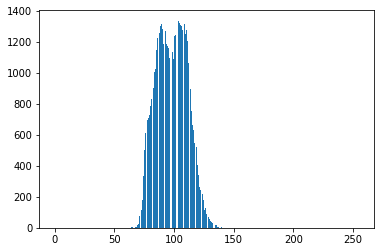

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("imori_dark.jpg").astype(np.float)
plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("answers/answer20.jpg")
plt.show()